***Nom: David Morillo Massagué***

***NIU: 1666540***

In [120]:
import random
import string
import numpy as np

# Paràmetres
tamany_poblacio = 10
longitud_paraula = 3
paraula_objectiu = "CAT"

# random.seed(1666540)


# Funció per generar una cadena aleatòria
def generar_cadena(longitud_paraula):
    return "".join(
        random.choice(string.ascii_uppercase) for _ in range(longitud_paraula)
    )


# Funció de fitness
def calcular_fitness(cadena):
    return sum(
        [1 if cadena[i] == paraula_objectiu[i] else 0 for i in range(len(cadena))]
    )


# Selecció per torneig
def seleccio(poblacio, fitness, k=3):
    pares = []
    for _ in range(len(poblacio) // 2):
        # CANVIAT: si k > len(poblacio), k = len(poblacio)
        if k > len(poblacio):
            k = len(poblacio)
        torneig = random.sample(range(len(poblacio)), k)
        guanyador = max(torneig, key=lambda i: fitness[i])
        pares.append(poblacio[guanyador])
    return pares


# Creuament
def creuament(pare1, pare2):
    longitud_paraula = len(pare1)
    punt = random.randint(1, longitud_paraula - 1)
    fill1 = pare1[:punt] + pare2[punt:]
    fill2 = pare2[:punt] + pare1[punt:]
    return fill1, fill2


# Mutació
def mutacio(cadena, taxa_mutacio=0.1):
    cadena_llista = list(cadena)
    for i in range(len(cadena)):
        if random.random() < taxa_mutacio:
            cadena_llista[i] = random.choice(string.ascii_uppercase)
    return "".join(cadena_llista)


# Crear nova població
def nova_poblacio(poblacio, fitness, taxa_mutacio=0.1):
    pares = seleccio(poblacio, fitness)
    fills = []
    for pare1, pare2 in zip(pares[::2], pares[1::2]):
        fill1, fill2 = creuament(pare1, pare2)
        fills.extend(
            [
                mutacio(fill1, taxa_mutacio=taxa_mutacio),
                mutacio(fill2, taxa_mutacio=taxa_mutacio),
            ]
        )
    return fills

In [121]:
def evolucio_genetica(tamany_poblacio=100, paraula_objectiu="CAT", taxa_mutacio=0.1, max_generacions=None, imprimir=False):
    if max_generacions is None:
        max_generacions = int(np.log2(tamany_poblacio))
    longitud_paraula = len(paraula_objectiu)
    # Generar població inicial
    poblacio = [generar_cadena(longitud_paraula) for _ in range(tamany_poblacio)]
    
    for generacio in range(max_generacions):
        fitness = [calcular_fitness(cadena) for cadena in poblacio]
        poblacio = nova_poblacio(poblacio, fitness, taxa_mutacio=taxa_mutacio)
        
        if imprimir:
            print("Generació", generacio, ":", poblacio)
        
        if len(poblacio) == 0:
            if imprimir:
                print("No s'ha trobat la solució")
            return -1
        elif paraula_objectiu in poblacio:
            if imprimir:
                print("Solució trobada a la generació", generacio)
            return generacio
        else:
            if imprimir:
                print("No s'ha trobat la solució a la generació", generacio)
    
    # imprimir resultat:
    if paraula_objectiu in poblacio:
        if imprimir:
            print("Solució trobada:", paraula_objectiu)
        return generacio
    else:
        return -1

# Exemple d'ús
paraula_objectiu = "CAT"
generacions = evolucio_genetica(paraula_objectiu=paraula_objectiu, imprimir=True, tamany_poblacio=100, taxa_mutacio=0.1)
print("Nombre de generacions:", generacions)

Generació 0 : ['SMM', 'RGT', 'CLN', 'DNA', 'LMG', 'QEY', 'ZDS', 'TTB', 'XJG', 'UKT', 'UMP', 'MFV', 'GMZ', 'NJT', 'NJJ', 'UOM', 'CFU', 'UNA', 'FMT', 'GZR', 'ZAU', 'DFA', 'GJZ', 'NMT', 'EGT', 'BSO', 'GJO', 'ZMT', 'NPM', 'EFB', 'VZK', 'CCZ', 'NFT', 'GMG', 'DCK', 'CFU', 'IWK', 'EGJ', 'GGE', 'BET', 'GIE', 'QMT', 'CCG', 'UJK', 'ZGH', 'NJL', 'ZJS', 'BZO', 'KDB', 'HTR']
No s'ha trobat la solució a la generació 0
Generació 1 : ['BSU', 'CCO', 'UJM', 'NPK', 'LNA', 'DMG', 'EGT', 'NJT', 'CLM', 'NPN', 'TZE', 'GGR', 'CFJ', 'NJU', 'ALM', 'UON', 'FMP', 'UMT', 'CFU', 'CFU', 'EGT', 'NWT', 'NDS', 'ZFT']
No s'ha trobat la solució a la generació 1
Generació 2 : ['EGP', 'FMT', 'NCO', 'CWT', 'CLM', 'CCO', 'EFT', 'EGT', 'UWT', 'DMT', 'CCO', 'CFU']
No s'ha trobat la solució a la generació 2
Generació 3 : ['EFO', 'CCT', 'CWT', 'DMT', 'ULM', 'CWT']
No s'ha trobat la solució a la generació 3
Generació 4 : ['CVO', 'CWT']
No s'ha trobat la solució a la generació 4
Generació 5 : []
No s'ha trobat la s

## 1. Objectiu de Paraula Diferent

In [122]:
# Modifica l’algoritme perqu`e trobi una altra paraula objectiu (per exemple,”HELLO”). Quins efectes t ́e sobre el rendiment de l’algoritme? Necessites canviar algun par`ametre (com la mida de la poblaci ́o, taxa de mutaci ́o, etc.) per aconseguir bons resultats?

paraula_objectiu = "HELLO"
generacions = evolucio_genetica(paraula_objectiu=paraula_objectiu, imprimir=True, tamany_poblacio=1000, taxa_mutacio=0.1)
print("Nombre de generacions:", generacions)

Generació 0 : ['AAWRO', 'OZOEO', 'GEPKN', 'PNLIS', 'KWHMQ', 'UVLSH', 'DEXDU', 'JDRLQ', 'WZIOR', 'HLYMO', 'ATZDS', 'GNLJT', 'NNHXN', 'UYVVY', 'IOYKF', 'LFFOQ', 'USANA', 'BHZIX', 'FEOXO', 'OZAWI', 'IYHNR', 'BJEEO', 'GHYPF', 'DWWUX', 'IRESK', 'TDKGR', 'JUYBD', 'PFDEO', 'IYHNB', 'ZBACO', 'SODZK', 'SMMLF', 'FPNRO', 'JTVTN', 'JFDLM', 'NJMEO', 'KZYWT', 'PBGGL', 'UFBJC', 'WBFFM', 'EWVUF', 'OSOIQ', 'NZOWM', 'ELTQO', 'FQUOH', 'XUWLN', 'ZOZQV', 'ULYNF', 'NEPQJ', 'GNLWM', 'ZOGGG', 'HWOUR', 'PFRIM', 'XILIK', 'ICARU', 'HQCHD', 'JMVAQ', 'DQIHV', 'AWVFY', 'PCNBD', 'COVSU', 'HZVDL', 'BFCUI', 'WQMNI', 'QOWDS', 'KEBBN', 'YWVTK', 'YERDJ', 'LTMOB', 'WCVUO', 'FQJLC', 'LAJZP', 'TPLIY', 'BHRCF', 'KJACB', 'ZBDAS', 'OQIWO', 'WRSMS', 'RUGRJ', 'AKBLO', 'HQXKG', 'GXOMW', 'RWXZX', 'EQTFC', 'HREDX', 'DWWIF', 'LNLCI', 'EAIIB', 'HQQKO', 'AFOYL', 'CGAON', 'IMURC', 'JFJGJ', 'CLKGR', 'JELLR', 'MIXDU', 'ZMQLF', 'RWVNE', 'OTBHO', 'LTMOP', 'WEWDK', 'AEYJV', 'VHLUM', 'INVVH', 'ORXLJ', 'NJMBU', 'UUALU', 'EZMGC', 'GEDBL', 'XE

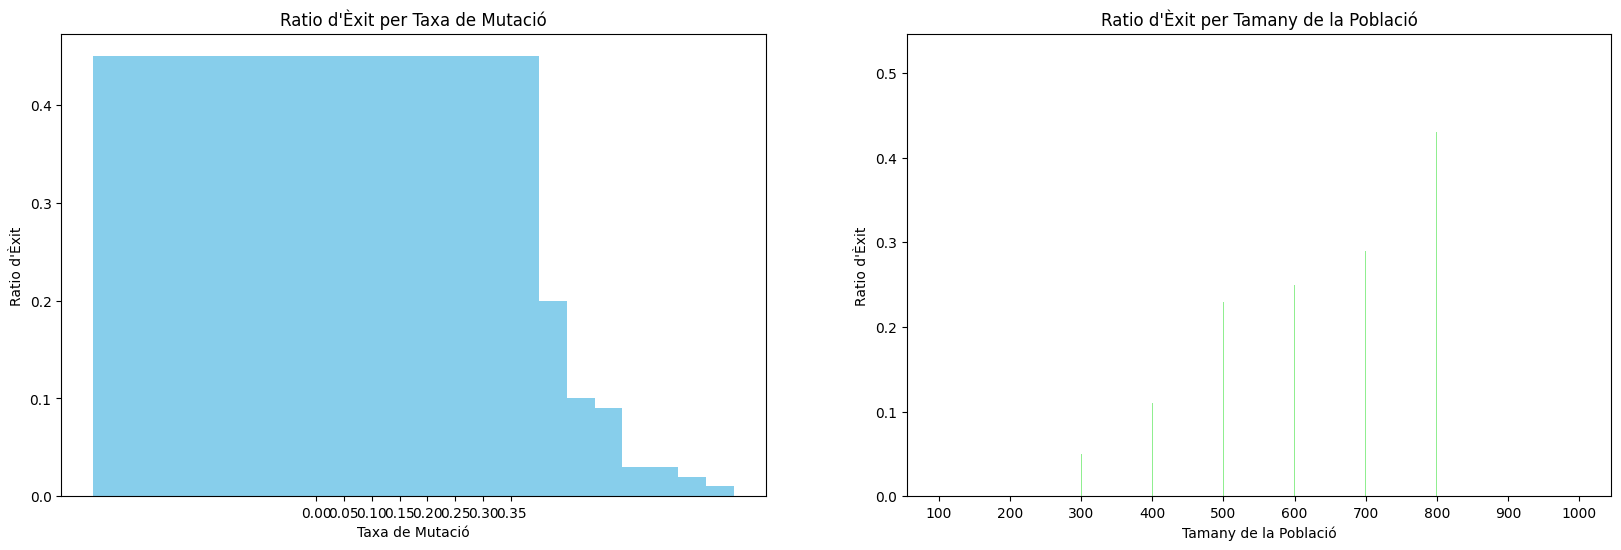

In [123]:
import matplotlib.pyplot as plt
import numpy as np

paraula_objectiu = "HELLO"

def crear_grafics(paraula_objectiu):
    # Definir el número de ejecuciones
    num_ejecuciones = 100

    taxes_mutacio = np.arange(0, 0.4, 0.05)
    tamanys_poblacio = np.arange(100, 1100, 100)

    # Inicializar un diccionario para almacenar los ratios de éxito
    ratios_exito_mutacio = {taxa: 0 for taxa in taxes_mutacio}
    ratios_exito_poblacio = {tamany: 0 for tamany in tamanys_poblacio}

    # Ejecutar la función evolucio_genetica para cada taxa de mutación
    for taxa in taxes_mutacio:
        exitos = 0
        for _ in range(num_ejecuciones):
            resultado = evolucio_genetica(paraula_objectiu=paraula_objectiu, imprimir=False, tamany_poblacio=500, taxa_mutacio=taxa)
            if resultado >= 0:
                exitos += 1
        ratios_exito_mutacio[taxa] = exitos / num_ejecuciones

    # Ejecutar la función evolucio_genetica para cada tamaño de población
    for tamany in tamanys_poblacio:
        exitos = 0
        for _ in range(num_ejecuciones):
            resultado = evolucio_genetica(paraula_objectiu=paraula_objectiu, imprimir=False, tamany_poblacio=tamany, taxa_mutacio=0.1)
            if resultado >= 0:
                exitos += 1
        ratios_exito_poblacio[tamany] = exitos / num_ejecuciones

    # Crear los gráficos uno al lado del otro
    fig, axs = plt.subplots(1, 2, figsize=(20, 6))

    # Gráfico para la taxa de mutación
    axs[0].bar(ratios_exito_mutacio.keys(), ratios_exito_mutacio.values(), color='skyblue')
    axs[0].set_xlabel('Taxa de Mutació')
    axs[0].set_ylabel('Ratio d\'Èxit')
    axs[0].set_title('Ratio d\'Èxit per Taxa de Mutació')
    axs[0].set_xticks(taxes_mutacio)

    # Gráfico para el tamaño de la población
    axs[1].bar(ratios_exito_poblacio.keys(), ratios_exito_poblacio.values(), color='lightgreen')
    axs[1].set_xlabel('Tamany de la Població')
    axs[1].set_ylabel('Ratio d\'Èxit')
    axs[1].set_title('Ratio d\'Èxit per Tamany de la Població')
    axs[1].set_xticks(tamanys_poblacio)

    plt.show()
    
crear_grafics(paraula_objectiu)

Observem amb els gràfics generats que necessitem un nombre més elevat de tamany de població per a que l'algoritme genètic trobi la solució. Observem també que, per a tenir una mitja d'èxit màxima, es necessiten menors valor de taxa de mutació. És important recalcar que una major taxa d'èxit no implica un menor nombre de generacions.

## 2. Augment de la Mida de la Població ##

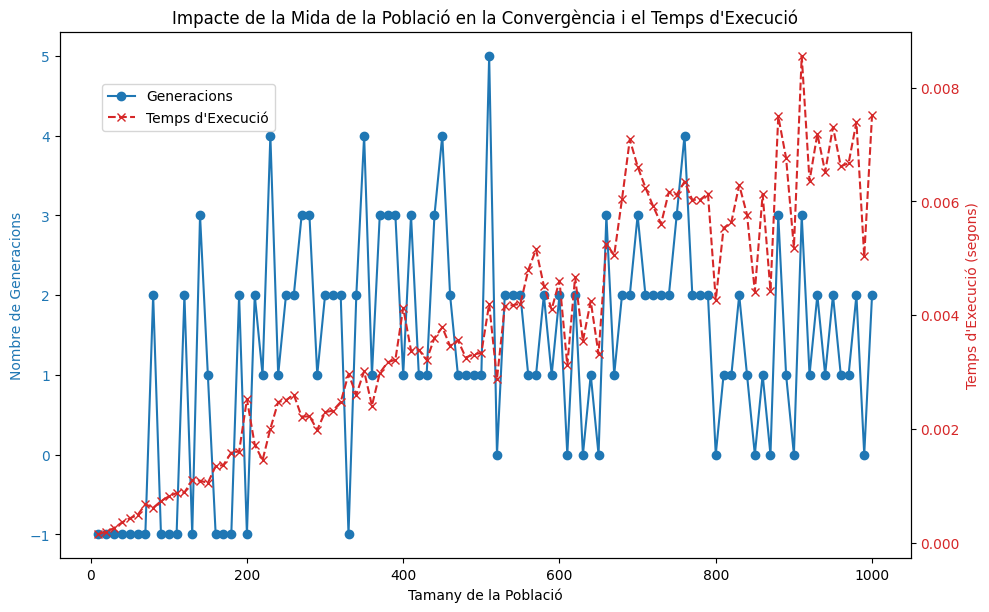

In [124]:
import time

# Modifica la mida de la poblaci ́o (per exemple, augmentant-la a 50 o 100 individus) i observa com aix`o afecta la converg`encia i el temps d’execuci ́o. Quin impacte t ́e una poblaci ́o m ́es gran en la qualitat de la soluci ́o final?
# Augmentar la mida de la població a 50 i 100 individus

paraula_objectiu = "CAT"

tamanys_poblacio_augmentats = np.arange(10, 1010, 10)
resultats = {}

for tamany in tamanys_poblacio_augmentats:
    start_time = time.time()
    generacions = evolucio_genetica(paraula_objectiu=paraula_objectiu, imprimir=False, tamany_poblacio=tamany, taxa_mutacio=0.1)
    end_time = time.time()
    temps_execucio = end_time - start_time
    resultats[tamany] = (generacions, temps_execucio)

"""# Mostrar els resultats
for tamany, (generacions, temps_execucio) in resultats.items():
    print(f"Tamany de la població: {tamany}")
    print(f"Nombre de generacions: {generacions}")
    print(f"Temps d'execució: {temps_execucio:.4f} segons")
    print()"""
    
# Crear un gráfico per mostrar l'impacte de la mida de la població en el nombre de generacions i el temps d'execució
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Tamany de la Població')
ax1.set_ylabel('Nombre de Generacions', color=color)
ax1.plot(resultats.keys(), [res[0] for res in resultats.values()], color=color, marker='o', label='Generacions')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel("Temps d'Execució (segons)", color=color)
ax2.plot(resultats.keys(), [res[1] for res in resultats.values()], color=color, marker='x', linestyle='--', label="Temps d'Execució")
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title("Impacte de la Mida de la Població en la Convergència i el Temps d'Execució")
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()

Sembla que la mida de la població afecta de manera lineal al temps d'execució. Veiem també com, a més població, més èxit tenim en trobar la solució (generació=-1 significa que no s'ha trobat solució).

## 3. Addició de Paràmetres Adicionals ##

In [125]:
# Modifica el codi per afegir una nova funci ́o de fitness que penalitzi les solucions si tenen m ́es d’un car`acter repetit. Com afecta aix`o a la cerca de la soluci ́o?

# Funció de fitness amb penalització per caràcters repetits
def calcular_fitness_modificat(cadena):
    fitness = sum(
        [1 if cadena[i] == paraula_objectiu[i] else 0 for i in range(len(cadena))]
    )
    # Penalització per caràcters repetits
    unique_chars = set(cadena)
    if len(unique_chars) < len(cadena):
        fitness -= (len(cadena) - len(unique_chars))
    return fitness

def evolucio_genetica(tamany_poblacio=100, paraula_objectiu="CAT", taxa_mutacio=0.1, max_generacions=None, imprimir=False):
    if max_generacions is None:
        max_generacions = int(np.log2(tamany_poblacio))
    longitud_paraula = len(paraula_objectiu)
    # Generar població inicial
    poblacio = [generar_cadena(longitud_paraula) for _ in range(tamany_poblacio)]
    
    for generacio in range(max_generacions):
        fitness = [calcular_fitness_modificat(cadena) for cadena in poblacio]
        poblacio = nova_poblacio(poblacio, fitness, taxa_mutacio=taxa_mutacio)
        
        if imprimir:
            print("Generació", generacio, ":", poblacio)
        
        if len(poblacio) == 0:
            if imprimir:
                print("No s'ha trobat la solució")
            return -1
        elif paraula_objectiu in poblacio:
            if imprimir:
                print("Solució trobada a la generació", generacio)
            return generacio
        else:
            if imprimir:
                print("No s'ha trobat la solució a la generació", generacio)
    
    # imprimir resultat:
    if paraula_objectiu in poblacio:
        if imprimir:
            print("Solució trobada:", paraula_objectiu)
        return generacio
    else:
        return -1

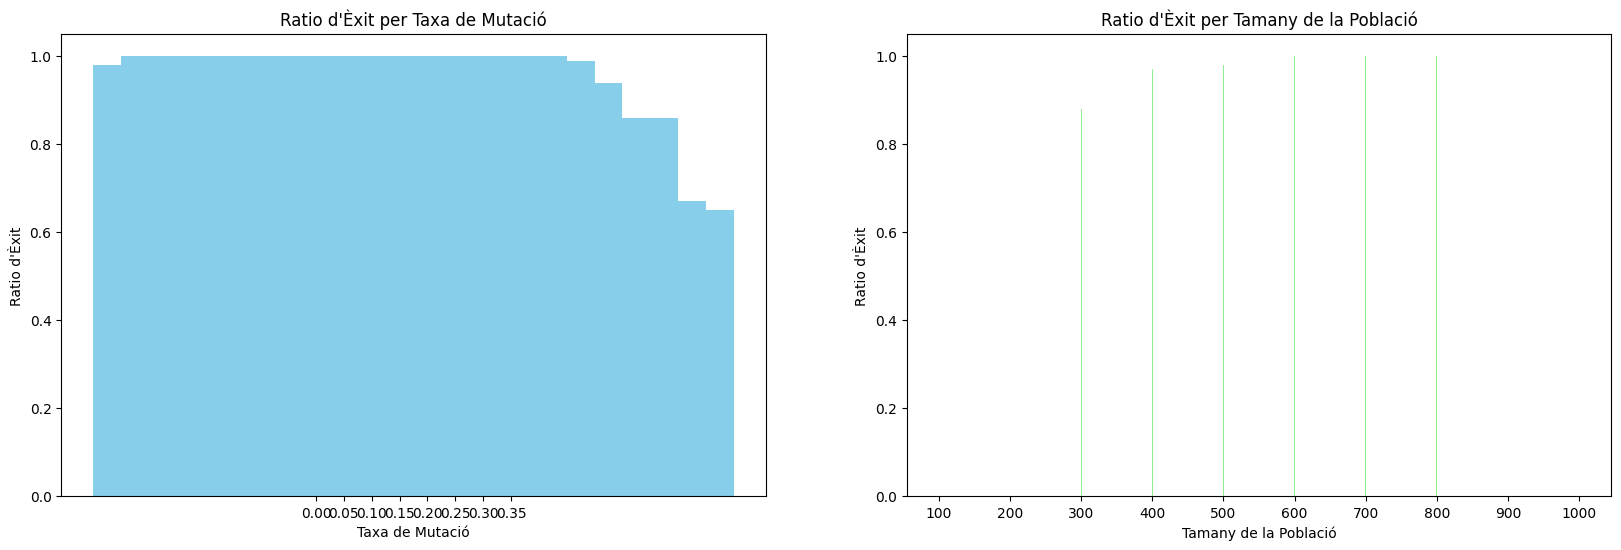

In [126]:
crear_grafics(paraula_objectiu)

Veiem que, amb l'ajust de la funció de fitness, el ratio d'èxit és molt més gran, tant com variem la taxa de mutació com el tamany de la població

In [127]:
# TORNEM A POSAR EL FITNESS ORIGINAL

def evolucio_genetica(tamany_poblacio=100, paraula_objectiu="CAT", taxa_mutacio=0.1, max_generacions=None, imprimir=False):
    if max_generacions is None:
        max_generacions = int(np.log2(tamany_poblacio))
    longitud_paraula = len(paraula_objectiu)
    # Generar població inicial
    poblacio = [generar_cadena(longitud_paraula) for _ in range(tamany_poblacio)]
    
    for generacio in range(max_generacions):
        fitness = [calcular_fitness(cadena) for cadena in poblacio]
        poblacio = nova_poblacio(poblacio, fitness, taxa_mutacio=taxa_mutacio)
        
        if imprimir:
            print("Generació", generacio, ":", poblacio)
        
        if len(poblacio) == 0:
            if imprimir:
                print("No s'ha trobat la solució")
            return -1
        elif paraula_objectiu in poblacio:
            if imprimir:
                print("Solució trobada a la generació", generacio)
            return generacio
        else:
            if imprimir:
                print("No s'ha trobat la solució a la generació", generacio)
    
    # imprimir resultat:
    if paraula_objectiu in poblacio:
        if imprimir:
            print("Solució trobada:", paraula_objectiu)
        return generacio
    else:
        return -1

## 4. Població Inicial Aleatòria ##

In [128]:
# Actualment, la poblaci ́o inicial es genera aleat`oriament. Qu`e passaria si inicialitzem una part de la poblaci ́o amb cadenes de car`acters que ja continguin alguna lletra de la paraula C ̧ AT”? Prova-ho i observa si l’algoritme convergeix m ́es r`apidament.

# Funció per generar una població inicial amb una part de la cadena que contingui alguna lletra de la paraula objectiu
def generar_poblacio_inicial(tamany_poblacio, longitud_paraula, paraula_objectiu, proporcio_inicialitzada=0.5):
    poblacio = []
    num_inicialitzats = int(tamany_poblacio * proporcio_inicialitzada)
    
    # Generar cadenes inicialitzades amb alguna lletra de la paraula objectiu
    for _ in range(num_inicialitzats):
        cadena = list(generar_cadena(longitud_paraula))
        pos = random.randint(0, longitud_paraula - 1)
        cadena[pos] = paraula_objectiu[pos]
        poblacio.append("".join(cadena))
    
    # Generar cadenes aleatòries per la resta de la població
    for _ in range(tamany_poblacio - num_inicialitzats):
        poblacio.append(generar_cadena(longitud_paraula))
    
    return poblacio

# Modificar la funció evolucio_genetica per utilitzar la nova funció de generació de població inicial
def evolucio_genetica(tamany_poblacio=100, paraula_objectiu="CAT", taxa_mutacio=0.1, max_generacions=None, imprimir=False):
    if max_generacions is None:
        max_generacions = int(np.log2(tamany_poblacio))
    longitud_paraula = len(paraula_objectiu)
    # Generar població inicial
    poblacio = generar_poblacio_inicial(tamany_poblacio, longitud_paraula, paraula_objectiu)
    
    for generacio in range(max_generacions):
        fitness = [calcular_fitness(cadena) for cadena in poblacio]
        poblacio = nova_poblacio(poblacio, fitness, taxa_mutacio=taxa_mutacio)
        
        if imprimir:
            print("Generació", generacio, ":", poblacio)
        
        if len(poblacio) == 0:
            if imprimir:
                print("No s'ha trobat la solució")
            return -1
        elif paraula_objectiu in poblacio:
            if imprimir:
                print("Solució trobada a la generació", generacio)
            return generacio
        else:
            if imprimir:
                print("No s'ha trobat la solució a la generació", generacio)
    
    # imprimir resultat:
    if paraula_objectiu in poblacio:
        if imprimir:
            print("Solució trobada:", paraula_objectiu)
        return generacio
    else:
        return -1

# Exemple d'ús
paraula_objectiu = "CAT"
generacions = evolucio_genetica(paraula_objectiu=paraula_objectiu, imprimir=True, tamany_poblacio=100, taxa_mutacio=0.1)
print("Nombre de generacions:", generacions)

Generació 0 : ['CAE', 'SXZ', 'CAZ', 'ICX', 'DIM', 'CAU', 'CEQ', 'CAY', 'CFQ', 'CNF', 'CFT', 'CXZ', 'AGA', 'ZAN', 'EQD', 'SAT', 'FAT', 'EPC', 'CDA', 'CRN', 'TIV', 'CXT', 'FIG', 'CTB', 'ERM', 'CNT', 'DEQ', 'CAU', 'MKT', 'ADT', 'CAG', 'CSX', 'YAC', 'JAC', 'SQT', 'CAO', 'CTN', 'AAG', 'CFT', 'CAX', 'CJM', 'CAY', 'OMA', 'HCU', 'UVX', 'CCN', 'CAP', 'VXM', 'SZT', 'LAE']
No s'ha trobat la solució a la generació 0
Generació 1 : ['AAU', 'CEG', 'CAQ', 'CEE', 'CRO', 'CAN', 'CFN', 'CBT', 'JAY', 'CAC', 'SQT', 'SAT', 'ZAY', 'CCN', 'CDA', 'CDS', 'CAZ', 'CAW', 'CXH', 'CAZ', 'FXT', 'CAX', 'CXT', 'CNT']
No s'ha trobat la solució a la generació 1
Generació 2 : ['CAH', 'CAN', 'CAM', 'JAX', 'CNT', 'COW', 'CAT', 'SXH', 'CAC', 'CAC', 'CAT', 'SSQ']
Solució trobada a la generació 2
Nombre de generacions: 2


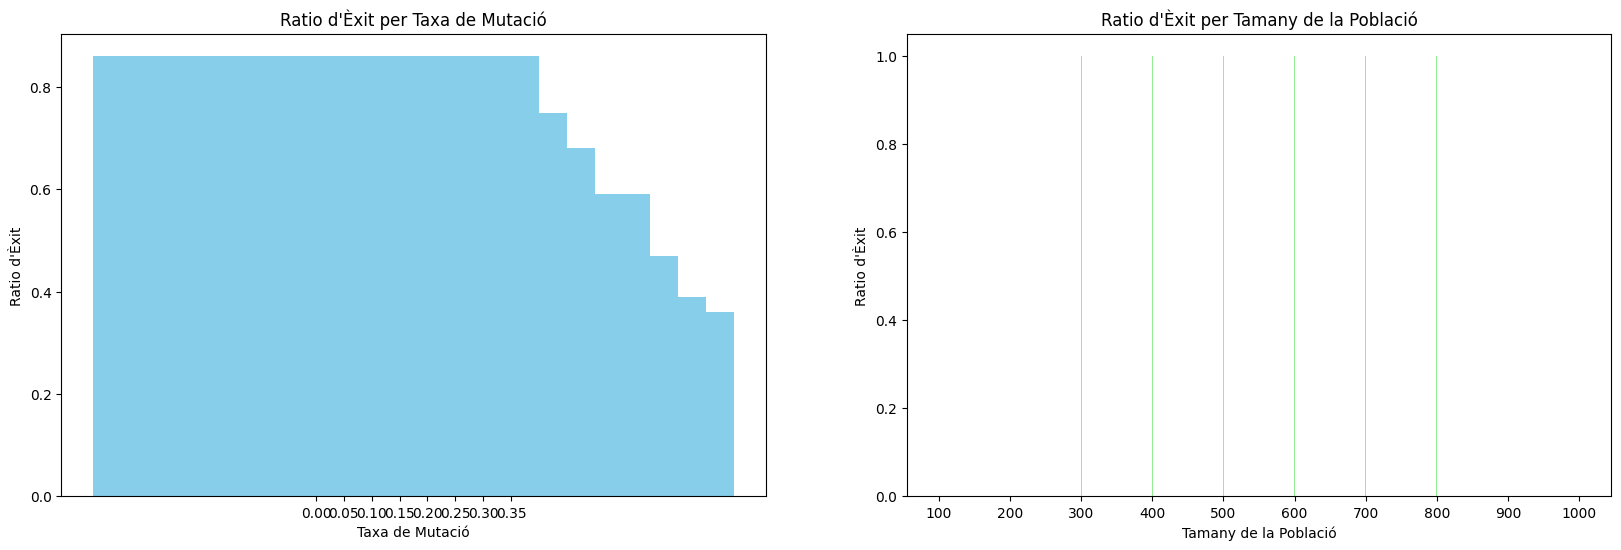

In [131]:
def crear_grafics(paraula_objectiu):
    # Definir el número de ejecuciones
    num_ejecuciones = 100

    taxes_mutacio = np.arange(0, 0.4, 0.05)
    tamanys_poblacio = np.arange(100, 1100, 100)

    # Inicializar un diccionario para almacenar los ratios de éxito
    ratios_exito_mutacio = {taxa: 0 for taxa in taxes_mutacio}
    ratios_exito_poblacio = {tamany: 0 for tamany in tamanys_poblacio}

    # Ejecutar la función evolucio_genetica para cada taxa de mutación
    for taxa in taxes_mutacio:
        exitos = 0
        for _ in range(num_ejecuciones):
            resultado = evolucio_genetica(paraula_objectiu=paraula_objectiu, imprimir=False, tamany_poblacio=50, taxa_mutacio=taxa)
            if resultado >= 0:
                exitos += 1
        ratios_exito_mutacio[taxa] = exitos / num_ejecuciones

    # Ejecutar la función evolucio_genetica para cada tamaño de población
    for tamany in tamanys_poblacio:
        exitos = 0
        for _ in range(num_ejecuciones):
            resultado = evolucio_genetica(paraula_objectiu=paraula_objectiu, imprimir=False, tamany_poblacio=tamany, taxa_mutacio=0.1)
            if resultado >= 0:
                exitos += 1
        ratios_exito_poblacio[tamany] = exitos / num_ejecuciones

    # Crear los gráficos uno al lado del otro
    fig, axs = plt.subplots(1, 2, figsize=(20, 6))

    # Gráfico para la taxa de mutación
    axs[0].bar(ratios_exito_mutacio.keys(), ratios_exito_mutacio.values(), color='skyblue')
    axs[0].set_xlabel('Taxa de Mutació')
    axs[0].set_ylabel('Ratio d\'Èxit')
    axs[0].set_title('Ratio d\'Èxit per Taxa de Mutació')
    axs[0].set_xticks(taxes_mutacio)

    # Gráfico para el tamaño de la población
    axs[1].bar(ratios_exito_poblacio.keys(), ratios_exito_poblacio.values(), color='lightgreen')
    axs[1].set_xlabel('Tamany de la Població')
    axs[1].set_ylabel('Ratio d\'Èxit')
    axs[1].set_title('Ratio d\'Èxit per Tamany de la Població')
    axs[1].set_xticks(tamanys_poblacio)

    plt.show()

crear_grafics("CAT")

Amb aquest nou ajust, en molts dels paràmetres establerts, l'algoritme genètic troba la solució. Resulta molt més eficient que l'ajust anterior.

## 5. Càlcul de Resultats ##

Generació 0 : ['KHW', 'NUH', 'ABY', 'XVL', 'CRT', 'OBS', 'OFB', 'DLS', 'IGL', 'UKX', 'KHR', 'XWH', 'CBX', 'FIQ', 'QQY', 'JAM', 'CBM', 'UAK', 'ORB', 'SYT', 'KXM', 'TJS', 'RQK', 'UGM', 'PYJ', 'OLB', 'GSM', 'UAH', 'ESI', 'XBZ', 'KRJ', 'ZXS', 'IFG', 'VYN', 'JWA', 'PGY', 'NUD', 'GEW', 'WZJ', 'GZL', 'YET', 'ORC', 'KYK', 'VJL', 'OAY', 'JRT', 'MYV', 'PNI', 'GQC', 'LAF']
No s'ha trobat la solució a la generació 0
Generació 1 : ['UAH', 'UAK', 'CRT', 'YET', 'JAQ', 'FIM', 'NWH', 'XUD', 'URT', 'CAH', 'LRT', 'JPF', 'OAH', 'UAY', 'KXK', 'UAM', 'GSJ', 'WZM', 'PIK', 'RIT', 'LOL', 'GAF', 'GLS', 'DYC']
No s'ha trobat la solució a la generació 1
Generació 2 : ['UAQ', 'JAV', 'LRS', 'GLT', 'ERT', 'CET', 'CRH', 'DAT', 'GAH', 'CAX', 'KXT', 'URK']
No s'ha trobat la solució a la generació 2
Generació 3 : ['DAT', 'DLT', 'CXT', 'KET', 'JAH', 'CEV']
No s'ha trobat la solució a la generació 3
Generació 4 : ['DAH', 'JAT']
No s'ha trobat la solució a la generació 4
Generació 5 : []
No s'ha trobat la solució
Nombre de

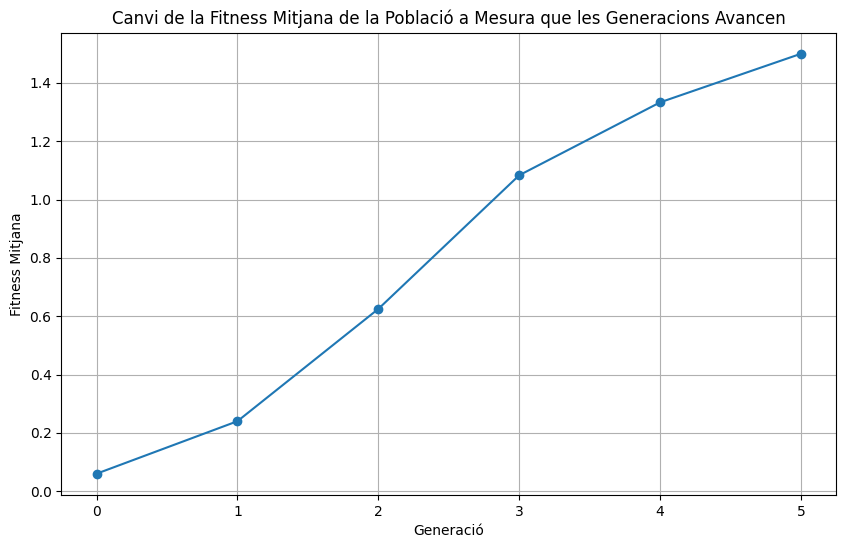

In [114]:
def evolucio_genetica(tamany_poblacio=100, paraula_objectiu="CAT", taxa_mutacio=0.1, max_generacions=None, imprimir=False):
    if max_generacions is None:
        max_generacions = int(np.log2(tamany_poblacio))
    longitud_paraula = len(paraula_objectiu)
    # Generar població inicial
    poblacio = [generar_cadena(longitud_paraula) for _ in range(tamany_poblacio)]
    
    fitness_mitjana_per_generacio = []
    
    for generacio in range(max_generacions):
        fitness = [calcular_fitness(cadena) for cadena in poblacio]
        fitness_mitjana_per_generacio.append(np.mean(fitness))
        poblacio = nova_poblacio(poblacio, fitness, taxa_mutacio=taxa_mutacio)
        
        if imprimir:
            print("Generació", generacio, ":", poblacio)
        
        if len(poblacio) == 0:
            if imprimir:
                print("No s'ha trobat la solució")
            return -1, fitness_mitjana_per_generacio
        elif paraula_objectiu in poblacio:
            if imprimir:
                print("Solució trobada a la generació", generacio)
            return generacio, fitness_mitjana_per_generacio
        else:
            if imprimir:
                print("No s'ha trobat la solució a la generació", generacio)
    
    # imprimir resultat:
    if paraula_objectiu in poblacio:
        if imprimir:
            print("Solució trobada:", paraula_objectiu)
        return generacio, fitness_mitjana_per_generacio
    else:
        return -1, fitness_mitjana_per_generacio

# Exemple d'ús
paraula_objectiu = "CAT"
generacions, fitness_mitjana_per_generacio = evolucio_genetica(paraula_objectiu=paraula_objectiu, imprimir=True, tamany_poblacio=100, taxa_mutacio=0.1)
print("Nombre de generacions:", generacions)

# Crear el gràfic
plt.figure(figsize=(10, 6))
plt.plot(fitness_mitjana_per_generacio, marker='o')
plt.xlabel('Generació')
plt.ylabel('Fitness Mitjana')
plt.title('Canvi de la Fitness Mitjana de la Població a Mesura que les Generacions Avancen')
plt.grid(True)
plt.show()

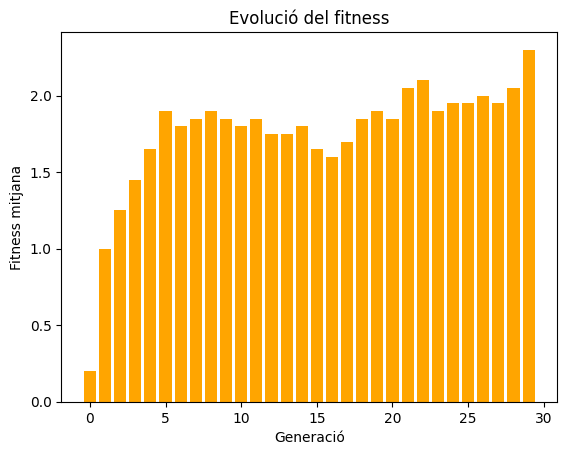

In [197]:
import random
import string
import matplotlib.pyplot as plt

# Paràmetres inicials
tamany_poblacio = 20
longitud_paraula = 3
lletra_objectiu = "CAT"
taxa_mutacio = 0.05
generacions = 30

# Funció per generar una cadena aleatòria
def generar_cadena(longitud_paraula):
    return ''.join(random.choice(string.ascii_uppercase) for _ in range(longitud_paraula))

# Funció de fitness
def calcular_fitness(cadena, lletra_objectiu):
    return sum([1 if cadena[i] == lletra_objectiu[i] else 0 for i in range(len(cadena))])

# Funció de creuament de dues cadenes
def creuar_cadenes(pare1, pare2, longitud_paraula):
    punt_creuament = random.randint(1, longitud_paraula - 1)
    return pare1[:punt_creuament] + pare2[punt_creuament:]

# Funció de mutació amb probabilitat definida per taxa_mutacio
def mutar_cadena(cadena, taxa_mutacio):
    cadena_mutada = list(cadena)
    for i in range(len(cadena)):
        if random.random() < taxa_mutacio:
            cadena_mutada[i] = random.choice(string.ascii_uppercase)
    return ''.join(cadena_mutada)

# Funció per crear una nova població amb selecció, creuament i mutació
def nova_poblacio(poblacio, fitness, tamany_poblacio, longitud_paraula, taxa_mutacio):
    nova_poblacio = []
    for _ in range(tamany_poblacio):
        # Selecció de parelles basades en el fitness
        pares = random.choices(poblacio, weights=fitness, k=2)
        fill = creuar_cadenes(pares[0], pares[1], longitud_paraula)
        fill = mutar_cadena(fill, taxa_mutacio)
        nova_poblacio.append(fill)
    return nova_poblacio

# Generar població inicial
poblacio = [generar_cadena(longitud_paraula) for _ in range(tamany_poblacio)]

# Seguiment del fitness mitjà durant les generacions
fitness_history = []

for _ in range(generacions):
    fitness = [calcular_fitness(cadena, lletra_objectiu) for cadena in poblacio]
    fitness_history.append(sum(fitness) / len(fitness))
    poblacio = nova_poblacio(poblacio, fitness, tamany_poblacio, longitud_paraula, taxa_mutacio)

# Gràfic de l'evolució del fitness
plt.bar(range(generacions), fitness_history, color='orange')
plt.xlabel("Generació")
plt.ylabel("Fitness mitjana")
plt.title("Evolució del fitness")
plt.show()

S'observa un creixement (molt ràpidament al principi) del fitness, gràcies a la modificació que es fa de la població amb les funcions de mutació i creuament.